In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Create Synthetic data

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
n = int(3000)
# alpha1 = 0.666, alpha2 = -.333
alphas = np.array([.1])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
# # AR(2)
# ar2 = arma_generate_sample(ar=ar, ma=ma, nsample=n) 
# plt.figure(figsize=(20,5))
# plt.plot( ar2)

T_1 =  arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_2 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_3 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_4 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_5 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
M =[[1 , 0 , 0 , 0 , 1],
[0 , 1 , 0 , 0 , 1],
[0 , 0 , 1 , 0 , 1],
[0 , 0 , 0 , 1 , 1],
[1 , -1 , 0 , 0 , 1]]
delta = np.zeros((n,1))
delta_anomal = np.zeros((n,1))
delta_anomal[300:320]   = np.ones((20,1))
delta_anomal[600:610]   = np.full((10,1),-0.7)
delta_anomal[1300:1320] = np.full((20,1),2)
delta_anomal[2100:2150] = np.full((50,1),-1.5)

# delta_anomal[41:50] = np.ones((9,1))
N = np.concatenate((T_1,T_2,T_3,T_4,delta), axis=1)
N_anomal =  np.concatenate((T_1,T_2,T_3,T_4,delta_anomal), axis=1)
B = N@M
B_anomal = N_anomal@M

T_1 = B[:,0]
T_2 = B[:,1]
T_3 = B[:,2]
T_4 = B[:,3]
T_5 = B[:,4]


T_1_anomal = B_anomal[:,0]
T_2_anomal = B_anomal[:,1]
T_3_anomal = B_anomal[:,2]
T_4_anomal = B_anomal[:,3]
T_5_anomal = B_anomal[:,4]

MD_T = np.concatenate((T_1.reshape((-1,1)),T_2.reshape((-1,1)),T_3.reshape((-1,1)),T_4.reshape((-1,1)),T_5.reshape((-1,1))),axis=1)
MD_T_anomaly = np.concatenate((T_1_anomal.reshape((-1,1)),T_2_anomal.reshape((-1,1)),T_3_anomal.reshape((-1,1)),T_4_anomal.reshape((-1,1)),T_5_anomal.reshape((-1,1))),axis=1)
MD_T.shape,MD_T_anomaly.shape

labels = np.zeros((n,1))
labels[300:320]     = 1
labels[600:610]     = 1
labels[1300:1320]   = 1
labels[2100:2150]   = 1
df_synthetic = pd.DataFrame(np.concatenate((MD_T_anomaly,labels), axis = 1))
df_synthetic.columns =  np.r_[np.array(['V'+str(i) for i in range(1,6)]),['is_anomaly']]
df_synthetic

,V1,V2,V3,V4,V5,is_anomaly
0,0.496714,-1.907808,-1.114081,0.765402,-1.759773,0.0
1,-0.088593,-1.051166,-0.742339,1.149953,-0.732145,0.0
2,0.638829,-0.518722,-1.016294,0.613685,-0.282502,0.0
3,1.586913,1.835815,-0.649625,-1.881129,0.891974,0.0
4,-0.075462,0.740135,-0.279113,-0.343535,0.042024,0.0
...,...,...,...,...,...,...
2995,-0.019684,0.262047,0.081516,-1.146083,-0.822204,0.0
2996,0.255784,1.178853,1.175369,-0.187431,2.422576,0.0
2997,-1.216182,-1.099519,1.705984,0.819271,0.209554,0.0
2998,0.212558,0.357999,-0.514389,-0.018769,0.037399,0.0


# MLP

In [0]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class MLP_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a.reshape(-1))
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)


    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):
        set_random_seed(42)
        seed(42)

        self.model = Sequential()
        self.model.add(Dense(30, activation='relu', input_dim=self.window_width*self.dimension))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(20, activation='relu'))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=1)

        self.plotTraining()

        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

        # xgb = XGBRegressor()
        # xgb.fit(self.train_X.reshape(-1,1),self.train_y.reshape(-1,1))

        # rmse = sqrt(mean_squared_error(self.test, self.predictions))
        # self.errors = np.absolute(self.test - np.array(self.predictions))
        # print('Prediction Test RMSE: %.3f' % rmse)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)
				
    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)        
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# # mlp = MLP_AnomalyDetection('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv',100,9,30,0.3)
# mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3)
# mlp.fit()
# # mlp.plot()
# mlp.get_roc_auc(verbose=False)


In [0]:
0.46719427454831985

## Evaluation

### Mahalanobis

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Train on 798 samples, validate on 79 samples
Epoch 1/30
798/798 [==============================] - 22s 28ms/step - loss: 1.1077 - val_loss: 0.9955
Epoch 2/30
798/798 [==============================] - 0s 252us/step - loss: 0.6104 - val_loss: 1.0685
Epoch 3/30
798/798 [==============================] - 0s 246us/step - loss: 0.2988 - val_loss: 1.1171
Epoch 4/30
798/798 [==============================] - 0s 235us/step - loss: 0.1113 - val_loss: 1.1238
Epoch 5/30
798/798 [==============================] - 0s 241us/step - loss: 0.0476 - val_loss: 1.1320
Epoch 6/30
798/798 [==============================] - 0s 251us/step - loss: 0.0279 - val_loss: 1.1200
Epoch 7/30
798/798 [==============================] - 0s 249us/step - loss: 0.0223 - val_loss: 1.1215
Epoch 8/30
798/798 [==============================] - 0s 268us/step - loss: 0.0218 - val_loss: 1.1252
Epoch 9/30
798/798 [==============================] - 0s 247us/step - loss: 0.0180 - val_loss: 1.1349
Epoch 10/30
798/798 [================

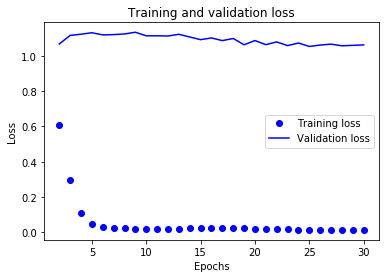

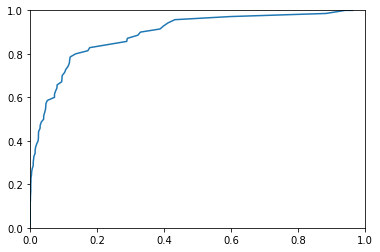

AUC:  0.8559486607142855
Time:  37


In [0]:
import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3,'mahalanobis')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Train on 14627 samples, validate on 1462 samples
Epoch 1/30
14627/14627 [==============================] - 3s 181us/step - loss: 1.1377 - val_loss: 0.7150
Epoch 2/30
14627/14627 [==============================] - 2s 153us/step - loss: 1.1185 - val_loss: 0.7165
Epoch 3/30
14627/14627 [==============================] - 2s 151us/step - loss: 1.1103 - val_loss: 0.7212
Epoch 4/30
14627/14627 [==============================] - 2s 154us/step - loss: 1.0934 - val_loss: 0.7297
Epoch 5/30
14627/14627 [==============================] - 2s 153us/step - loss: 1.0662 - val_loss: 0.7408
Epoch 6/30
14627/14627 [==============================] - 2s 152us/step - loss: 1.0328 - val_loss: 0.7535
Epoch 7/30
14627/14627 [==============================] - 2s 151us/step - loss: 0.9907 - val_loss: 0.7752
Epoch 8/30
14627/14627 [==============================] - 2s 153us/step - loss: 0.9514 - val_loss: 0.7592
Epoch 9/30
14627/14627 [==============================] - 2s 149us/step - loss: 0.9164 - val_loss: 0.78

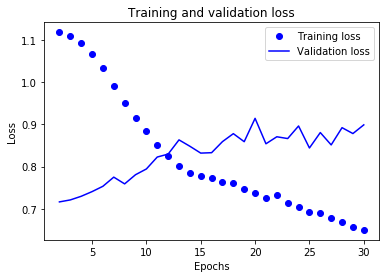

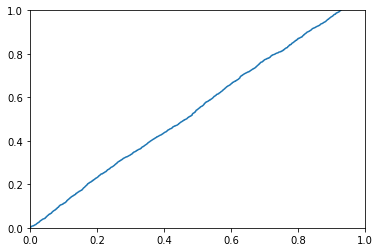

AUC:  0.47170960141979185
Time:  71


In [0]:

import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv',None,100,9,30,0.3,'mahalanobis')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

### Euclidean

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Train on 798 samples, validate on 79 samples
Epoch 1/30
798/798 [==============================] - 23s 28ms/step - loss: 1.1117 - val_loss: 0.9875
Epoch 2/30
798/798 [==============================] - 0s 229us/step - loss: 0.6231 - val_loss: 1.0700
Epoch 3/30
798/798 [==============================] - 0s 234us/step - loss: 0.3158 - val_loss: 1.1222
Epoch 4/30
798/798 [==============================] - 0s 239us/step - loss: 0.1193 - val_loss: 1.1202
Epoch 5/30
798/798 [==============================] - 0s 251us/step - loss: 0.0500 - val_loss: 1.1368
Epoch 6/30
798/798 [==============================] - 0s 243us/step - loss: 0.0280 - val_loss: 1.1368
Epoch 7/30
798/798 [==============================] - 0s 237us/step - loss: 0.0222 - val_loss: 1.1321
Epoch 8/30
798/798 [==============================] - 0s 227us/step - loss: 0.0216 - val_loss: 1.1225
Epoch 9/30
798/798 [==============================] - 0s 242us/step - loss: 0.0193 - val_loss: 1.1323
Epoch 10/30
798/798 [================

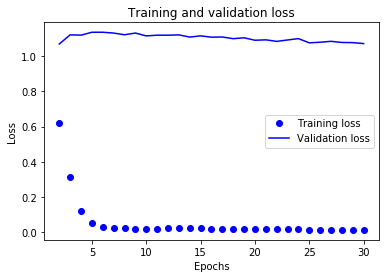

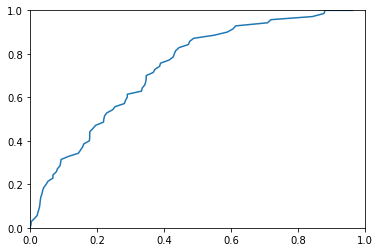

AUC:  0.6997358630952379
Time:  38


In [0]:
import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3,'euclidean')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Train on 14627 samples, validate on 1462 samples
Epoch 1/30
14627/14627 [==============================] - 3s 201us/step - loss: 1.1326 - val_loss: 0.7154
Epoch 2/30
14627/14627 [==============================] - 3s 181us/step - loss: 1.1176 - val_loss: 0.7161
Epoch 3/30
14627/14627 [==============================] - 3s 181us/step - loss: 1.1028 - val_loss: 0.7183
Epoch 4/30
14627/14627 [==============================] - 3s 176us/step - loss: 1.0564 - val_loss: 0.7478
Epoch 5/30
14627/14627 [==============================] - 3s 177us/step - loss: 1.0233 - val_loss: 0.7230
Epoch 6/30
14627/14627 [==============================] - 3s 178us/step - loss: 0.9856 - val_loss: 0.7284
Epoch 7/30
14627/14627 [==============================] - 3s 177us/step - loss: 0.9043 - val_loss: 0.7497
Epoch 8/30
14627/14627 [==============================] - 3s 179us/step - loss: 0.8125 - val_loss: 0.7341
Epoch 9/30
14627/14627 [==============================] - 3s 176us/step - loss: 0.8483 - val_loss: 0.72

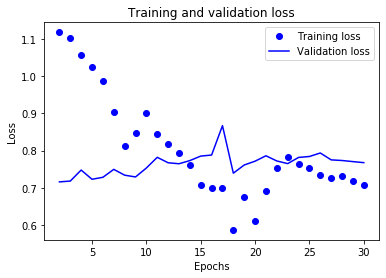

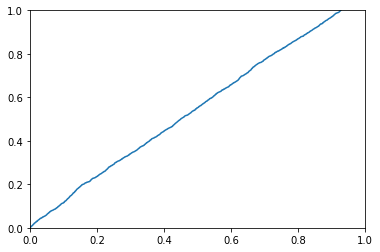

AUC:  0.47635056535924913
Time:  82


In [0]:

import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv',None,100,9,30,0.3,'euclidean')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

# CNN

In [0]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class CNN_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense,distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):
        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()
        self.model.add(Conv1D(filters=self.n_filters[0], kernel_size=self.kernel_size, activation='relu', input_shape=(self.window_width,self.dimension ),data_format='channels_first', padding='same'))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[1], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same'))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[2], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same'))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Flatten())
        self.model.add(Dense(self.n_dense, activation='relu'))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8], [4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = CNN_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break
# print(best_auc)

## Evaluation

### Mahalanobis

In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
histories.append(((f,k,d), hist))
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.921954470139039
Time:  35


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv',None,30,9,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.46895499451271505
Time:  58


### Euclidean

In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
histories.append(((f,k,d), hist))
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.7735501765002522
Time:  35


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv',None,30,9,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.4760057352742635
Time:  57


# CNN BatchNormalization

In [0]:
import scipy.linalg
from scipy.spatial import distance
import keras 
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten, Input, BatchNormalization, Activation
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class CNN_Batch_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten

        channel_pos = 'channels_first'
        inp_shape = Input((self.window_width,self.dimension),name='input1')
        x = Conv1D(self.n_filters[0], kernel_size=self.kernel_size, padding = 'same', input_shape=(self.window_width,self.dimension),data_format=channel_pos,name='conv2d_Prep')(inp_shape)
        x = BatchNormalization(axis=1,name='batch_normalization_prep')(x)
        x_a1 = Activation('relu',name='activation_prep')(x)
        activated_x = x_a1

        #     activated_x, x
        nr = 1 *2 -1
        x = Conv1D(self.n_filters[1], kernel_size=self.kernel_size, name = 'conv2d_'+str(nr), padding='same',data_format=channel_pos)(activated_x)
        x = BatchNormalization(axis=1, name = 'batch_normalization_'+str(nr))(x)
        activated_x = Activation('relu',name='activation_'+str(nr+1))(x)
        activated_x = Flatten()(activated_x)
 
        activated_x = Dense(self.n_dense)(activated_x)
        output = Dense(self.dimension)(activated_x)

        from keras.models import Model
        self.model = Model(inp_shape,output )

        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8], [4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break
# print(best_auc)

## Evaluation

### Mahalanobis

In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.8943627980693034
Time:  36


In [0]:

import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,30,9,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626


AUC:  0.47191968382218996
Time:  84


### Euclidean

In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.7555399466897197
Time:  36


In [0]:

import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,30,9,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.47473441623186
Time:  85


# Resnet

In [0]:
import scipy.linalg
from scipy.spatial import distance
import keras 
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten, Input, BatchNormalization, Activation
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class CNN_Resnet_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):
        self.distance_function =  distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self, plot = False):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores(plot = plot)
        self.inverse_standardize_dataframe()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self, plot = False):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten

        channel_pos = 'channels_first'
        inp_shape = Input((self.window_width,self.dimension),name='input1')
        x = Conv1D(self.n_filters[0], kernel_size=self.kernel_size, padding = 'same', input_shape=(self.window_width,self.dimension),data_format=channel_pos,name='conv2d_Prep')(inp_shape)
        x = BatchNormalization(axis=1,name='batch_normalization_prep')(x)
        x_a1 = Activation('relu',name='activation_prep')(x)
        activated_x = x_a1

        #     activated_x, x
        nr = 1 *2 -1
        x = Conv1D(self.n_filters[1], kernel_size=self.kernel_size, name = 'conv2d_'+str(nr), padding='same',data_format=channel_pos)(activated_x)
        x = BatchNormalization(axis=1, name = 'batch_normalization_'+str(nr))(x)
        x = Activation('relu',name = 'activation_'+str(nr))(x)
        x = Conv1D(self.n_filters[2], kernel_size=self.kernel_size, name = 'conv2d_'+str(nr+1),padding = 'same',data_format=channel_pos)(x)
        x = BatchNormalization(axis=1, name = 'batch_normalization_'+str(nr+1))(x)
        x = keras.layers.add([x,activated_x],name='add_' + str(1))
        activated_x = Activation('relu',name='activation_'+str(nr+1))(x)
        activated_x = Flatten()(activated_x)
        activated_x = Dense(self.n_dense)(activated_x)
        output = Dense(self.dimension)(activated_x)

        from keras.models import Model
        self.model = Model(inp_shape,output )

        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        if plot:
            self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8], [4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break
# print(best_auc)

## Evaluation


### Mahalanobis

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


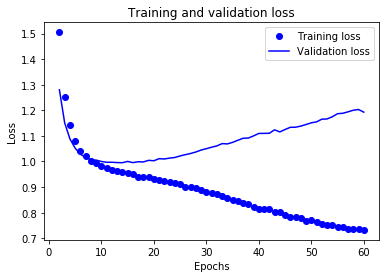

AUC:  0.9269403215831787
Time:  46


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,180,5,60,0.3,[3,3,3],1,18,'mahalanobis')
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

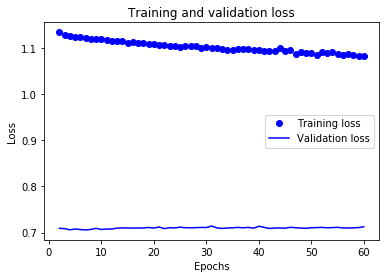

AUC:  0.4732414147439452
Time:  314


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,180,9,60,0.3,[3,3,3],1,18,'mahalanobis')
hist = cnn.fit(plot=True)
# histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)


### Euclidean

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


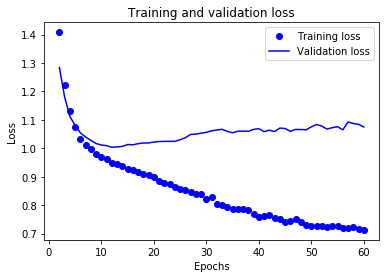

AUC:  0.7592029993815709
Time:  47


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,180,5,60,0.3,[3,3,3],1,18,'euclidean')
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

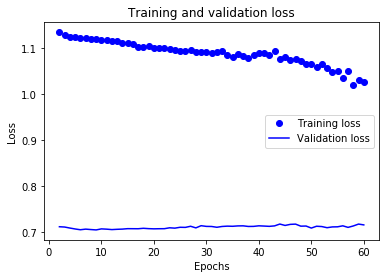

AUC:  0.4749194173505512
Time:  318


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,180,9,60,0.3,[3,3,3],1,18,'euclidean')
hist = cnn.fit(plot=True)
# histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


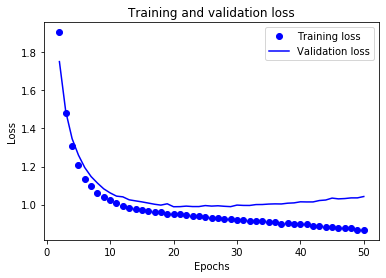

AUC:  0.7602232142857143
Time:  26


In [0]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,100,5,50,0.3,[4,4,4],1,18)
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)


# Wavenet

In [0]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class WaveNet_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()

        self.model.add(Conv1D(filters=self.n_filters[0], kernel_size=self.kernel_size, activation='relu', input_shape=(self.window_width,self.dimension ),data_format='channels_first', padding='same', dilation_rate=1))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[1], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate=2))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[2], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 4))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[3], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 8))
        self.model.add(MaxPooling1D(pool_size=2))

        self.model.add(Flatten())
        self.model.add(Dense(self.n_dense, activation='relu'))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)


    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def get_roc_auc(self, plot=True, verbose=True):
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = WaveNet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation 

### Mahalanobis

In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8,8],2,18, 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.933632303148188
Time:  29


In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,30,9,20,0.3,[8,8,8,8],2,18, 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

AUC:  0.47226477686150203
Time:  69


### Euclidean

In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8,8],2,18, 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.7758734961458108
Time:  30


In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,30,9,20,0.3,[8,8,8,8],2,18, 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

AUC:  0.4756995340412094
Time:  68


# LSTM

In [0]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class LSTM_AnomalyDetection_ML:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function):

        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        self.distance_function = distance_function

        self.n_filters = n_filters

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()

        import datetime
        startTime = datetime.datetime.now()

        self.train_X = numpy.reshape(self.train_X, (-1, self.window_width, self.dimension))
        self.test_X = numpy.reshape(self.test_X, (-1, self.window_width, self.dimension))

        self.model = Sequential()
        self.model.add(LSTM(self.n_filters[0], batch_input_shape=(1, self.window_width, self.dimension), stateful=True, return_sequences=True))
        self.model.add(LSTM(self.n_filters[1], batch_input_shape=(1, self.window_width, self.dimension), stateful=True))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        for i in range(self.n_epochs):
            print('Epoch',i, '/',self.n_epochs)
            self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, batch_size=1, verbose=1, shuffle=False)
            self.model.reset_states()
        # self.history =self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, verbose=2)
        
        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X, batch_size = 1)

        endTime = datetime.datetime.now()
        diff = endTime - startTime
        print('Train and Test time: ',diff.seconds)

        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   
    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,f)
#             cnn.fit()
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation

### Mahalanobis

In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 105s 121ms/step - loss: 0.9666
Train and Test time:  230
AUC:  0.936467113320366
Time:  230


In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,30,9,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 0 / 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
14697/14697 [==============================] - 1442s 98ms/step - loss: 1.1207
Train and Test time:  2999
AUC:  0.47035573795432223
Time:  3001


### Euclidean

In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 105s 121ms/step - loss: 0.9675
Train and Test time:  229
AUC:  0.7589186658021757
Time:  229


In [0]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv', None,30,9,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 0 / 1
Epoch 1/1
14697/14697 [==============================] - 1464s 100ms/step - loss: 1.1207
Train and Test time:  3046
AUC:  0.4751280805006092
Time:  3048


# GRU

In [0]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class GRU_AnomalyDetection_ML:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function):

        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        self.distance_function = distance_function
        self.n_filters = n_filters

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()

        # self.model.add(Conv1D(filters=self.n_filters[0], kernel_size=self.kernel_size, activation='relu', input_shape=(self.window_width,self.dimension ),data_format='channels_first', padding='same', dilation_rate=1))
        # self.model.add(MaxPooling1D(pool_size=2))
        # self.model.add(Conv1D(filters=self.n_filters[1], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate=2))
        # self.model.add(MaxPooling1D(pool_size=2))
        # self.model.add(Conv1D(filters=self.n_filters[2], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 4))
        # self.model.add(MaxPooling1D(pool_size=2))
        # self.model.add(Conv1D(filters=self.n_filters[3], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 8))
        # self.model.add(MaxPooling1D(pool_size=2))

        # self.model.add(Flatten())
        # self.model.add(Dense(self.n_dense, activation='relu'))
        # self.model.add(Dense(self.dimension))
        # self.model.compile(optimizer='adam', loss='mse')
        # self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)
        import datetime
        startTime = datetime.datetime.now()

        self.train_X = numpy.reshape(self.train_X, (-1, self.window_width, self.dimension))
        self.test_X = numpy.reshape(self.test_X, (-1, self.window_width, self.dimension))

        self.model = Sequential()
        self.model.add(GRU(self.n_filters[0], batch_input_shape=(1, self.window_width, self.dimension), stateful=True, return_sequences=True))
        self.model.add(GRU(self.n_filters[1], batch_input_shape=(1, self.window_width, self.dimension), stateful=True))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        for i in range(self.n_epochs):
            print('Epoch',i, '/',self.n_epochs)
            self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, batch_size=1, verbose=1, shuffle=False)
            self.model.reset_states()
        # self.history =self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, verbose=2)
        
        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X, batch_size = 1)

        endTime = datetime.datetime.now()
        diff = endTime - startTime
        print('Train and Test time: ',diff.seconds)

        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   
    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,f)
#             cnn.fit()
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation

### Mahalanobis

In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 89s 103ms/step - loss: 0.9777
Train and Test time:  191
AUC:  0.9299257978531805
Time:  191


In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

### Euclidean

In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 91s 105ms/step - loss: 0.9725
Train and Test time:  193
AUC:  0.7479036092500541
Time:  193


In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

# Autoencoder

In [0]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers, Model

def warn(*args, **kwargs):
    pass
    
class AutoEncoder_AnomalyDetection_ML:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, distance_function) -> 'AutoEncoder_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, distance_function) -> 'AutoEncoder_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()


        self.train_X = numpy.reshape(self.train_X, (-1, self.window_width, self.dimension))
        self.test_X = numpy.reshape(self.test_X, (-1, self.window_width, self.dimension))

        input_layer = Input(shape=( self.window_width, self.dimension))
        encoder = Dense(32, activation="relu")(input_layer)
        encoder = Dense(16, activation="relu")(encoder)
        decoder = Dense(16, activation="relu")(encoder)
        decoder = Dense(32, activation="relu")(decoder)
        decoder = Dense(self.dimension, activation="linear")(decoder)
        self.model = Model(inputs=input_layer, outputs=decoder)
        
        self.model.compile(metrics=['accuracy'],
                            loss='mean_squared_error',
                            optimizer='adam')
        channel_pos = 'channels_first'


        history = self.model.fit(self.train_X, self.train_X, epochs=self.n_epochs, verbose=2)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X, batch_size = 1)
        self.error_vect = (self.test_X.reshape(self.predictions.shape) - self.predictions).reshape(self.test_X.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)
                
    def get_roc_auc(self, plot=True, verbose=True):
        # self.euclidean_errors = numpy.linalg.norm((self.test_X.reshape(self.predictions.shape) - self.predictions).reshape(self.test_X.shape[0],-1), axis=1)
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
kernelsizes = [2,3,4,6,8,16]
dense = [18,36,72,144]

best_auc = [0,0]
histories = []
for f in filters:
    for k in kernelsizes:
        for d in dense:

            cnn = AutoEncoder_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3, 'euclidean')
            cnn.fit()
            # cnn.plot()
            auc = cnn.get_roc_auc(verbose=False,plot=False)
            print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
            if best_auc[1] < auc:
                print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
                best_auc = [(f,k,d),auc]
            break
        break
    break

print(best_auc)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 1/1
 - 11s - loss: 0.8430 - acc: 0.3319
AUC:  0.8780023053094158
 auc: 0.8780023053094158  - f: [8, 8, 8, 8]  - k: 2  - d: 18
New best auc: 0.8780023053094158  - f: [8, 8, 8, 8]  - k: 2  - d: 18
[([8, 8, 8, 8], 2, 18), 0.8780023053094158]


## Evaluation

### Mahalanobis


In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3, 'mahalanobis')
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 1/1
 - 20s - loss: 0.8559 - acc: 0.2854
AUC:  0.892623009869606
Time:  34


In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3, 'mahalanobis')
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 1/1


KeyboardInterrupt: ignored

### Euclidean

In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3, 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 1/1
 - 20s - loss: 0.8983 - acc: 0.3422
AUC:  0.8726028384122181
Time:  34


In [0]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3, 'euclidean')
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)